In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery
import seaborn as sns
import bq_helper
from bq_helper import BigQueryHelper
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Yearly progression of total crimes

In [150]:
per_year = """
           SELECT CAST(CONCAT(year,'-', month,'-',1) AS DATE) AS date, SUM(value) AS num_crimes
           FROM `bigquery-public-data.london_crime.crime_by_lsoa`
           WHERE value > 0
           GROUP BY year, month
           """
client = bigquery.Client()
query_job = client.query(per_year)
yearly = query_job.to_dataframe()

Using Kaggle's public dataset BigQuery integration.


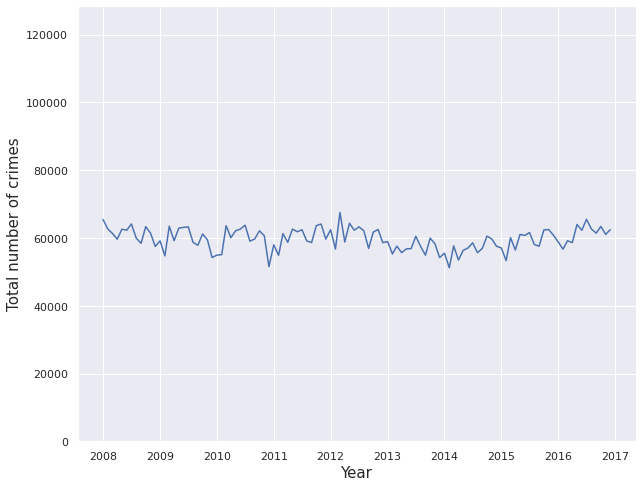

In [152]:
sns.set(style="darkgrid")
plt.figure(figsize = (10,8))
sns.lineplot(data=yearly, x='date', y='num_crimes')
plt.ylim(0,max(yearly['num_crimes'])*1.9)
plt.xlabel("Year", size=15)
plt.ylabel("Total number of crimes", size=15)
plt.show()

# Most frequent crimes for each borough

In [4]:
borough_crimes = """
                 WITH num_per_borough AS
                 (
                 SELECT borough, minor_category, SUM(value) AS num_crimes
                 FROM `bigquery-public-data.london_crime.crime_by_lsoa`
                 WHERE minor_category != 'Other Theft'
                 GROUP BY borough, minor_category
                 )
                 SELECT a.borough, a.minor_category, b.max_num_crimes
                 FROM num_per_borough AS a
                 INNER JOIN
                 (SELECT borough, MAX(num_crimes) AS max_num_crimes
                 FROM num_per_borough
                 GROUP BY borough
                 ) AS b
                 ON a.num_crimes = b.max_num_crimes
                 """
client = bigquery.Client()
query_job = client.query(borough_crimes)
crimes = query_job.to_dataframe()
crimes

Using Kaggle's public dataset BigQuery integration.


,borough,minor_category,max_num_crimes
0,City of London,Other Theft Person,194
1,Brent,Possession Of Drugs,24410
2,Barnet,Burglary in a Dwelling,26165
3,Bexley,Theft From Motor Vehicle,10498
4,Camden,Other Theft Person,26050


# Breakdown of theft types

In [5]:
theft_crimes = """
              SELECT minor_category, SUM(value) AS counts
              FROM `bigquery-public-data.london_crime.crime_by_lsoa`
              WHERE major_category = 'Theft and Handling'
              GROUP BY minor_category
              """
client = bigquery.Client()
query_job = client.query(theft_crimes)
theft = query_job.to_dataframe()

Using Kaggle's public dataset BigQuery integration.


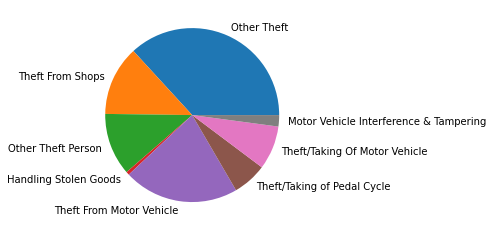

In [6]:
plt.pie(theft['counts'], labels = theft['minor_category'])
plt.show()

# Ranking of areas with most shop thefts

In [153]:
shop_theft = """
              SELECT borough, SUM(value) AS counts
              FROM `bigquery-public-data.london_crime.crime_by_lsoa`
              WHERE minor_category = 'Theft From Shops'
              GROUP BY borough
              ORDER BY counts DESC
              """
client = bigquery.Client()
query_job = client.query(shop_theft)
shops = query_job.to_dataframe()

Using Kaggle's public dataset BigQuery integration.


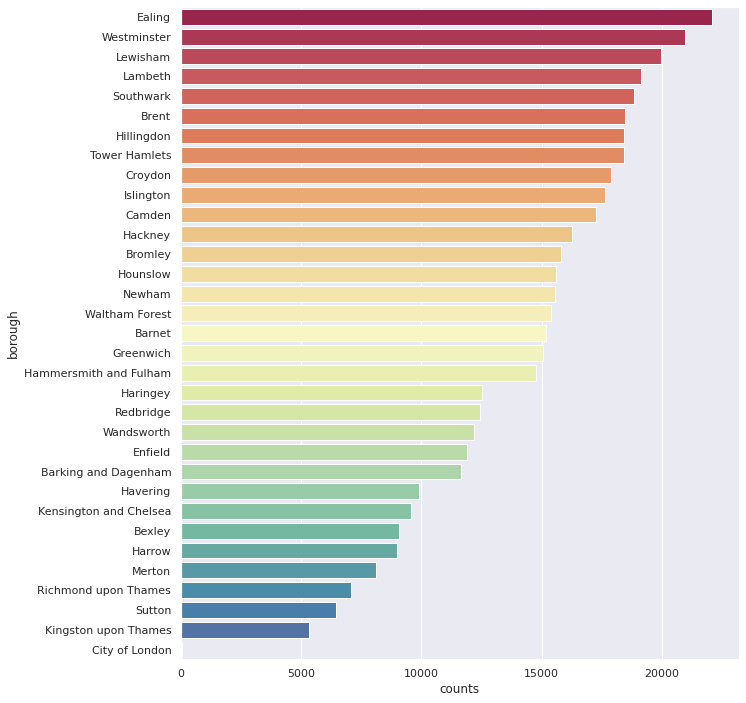

In [154]:
plt.figure(figsize=(10,12))
sns.set(style="darkgrid")
sns.barplot(x='counts',y='borough', data=shops, palette='Spectral')

# Progression of harassment crimes

In [108]:
harassment = """
              SELECT CAST(CONCAT(year,'-', month,'-',1) AS DATE) AS date, SUM(value) AS counts
              FROM `bigquery-public-data.london_crime.crime_by_lsoa`
              WHERE minor_category = 'Harassment' AND value > 0
              GROUP BY year, month
              """
client = bigquery.Client()
query_job = client.query(harassment)
harassment = query_job.to_dataframe()

Using Kaggle's public dataset BigQuery integration.


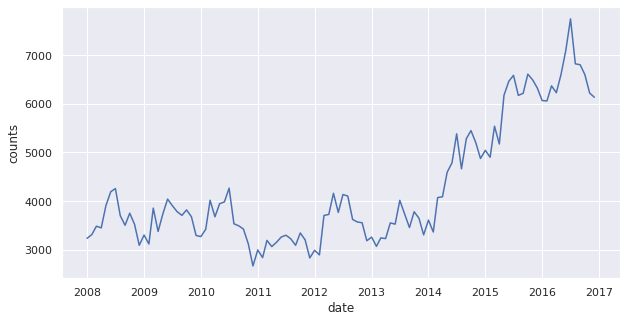

In [109]:
plt.figure(figsize=(10,5))
sns.lineplot(data=harassment, x='date', y='counts')

# Monthly distribution of harassment crimes

In [137]:
harassment_months = """
                    SELECT month, SUM(value) AS counts
                    FROM `bigquery-public-data.london_crime.crime_by_lsoa`
                    WHERE minor_category = 'Harassment' AND value > 0
                    GROUP BY month
                    ORDER BY month
                    """
client = bigquery.Client()
query_job = client.query(harassment_months)
harassment_months = query_job.to_dataframe()

Using Kaggle's public dataset BigQuery integration.


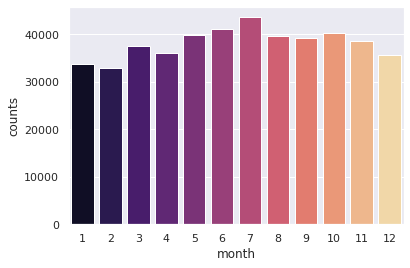

In [138]:
sns.barplot(data=harassment_months, x = 'month', y = 'counts', palette='magma')